## Objetivos

- Analizar como se distribuye el numero de paradas por ruta.
- Aplicarlo a `model_apply_inputs/new_route_data.json` (nuevos)
- Aplicarlo a `model_build_inputs/route_data.json` (historicos)

---

## Cargar los datos

Ver `data_structures.jl`.

In [3]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils)

route_data_script = joinpath("..", "src", "route_data.jl")
include(route_data_script);

data_json = joinpath("..", "data", "model_apply_inputs", "new_route_data.json");
route_data = read_json(data_json)

@time data = parse_route_data(route_data);

  0.142487 seconds (285.40 k allocations: 16.294 MiB, 97.68% compilation time)


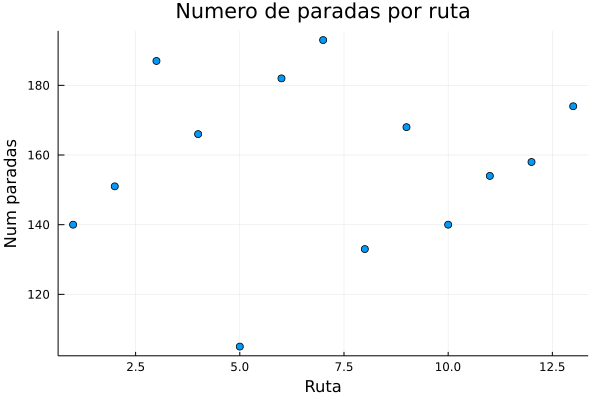

In [4]:
using Plots

num_paradas = [length(R.stops) for R in data]

# xticks=[("$i", i) for i in 1:13], 
plot(1:13, [length(R.stops) for R in data], seriestype=:scatter, xlab="Ruta", ylab="Num paradas", lab="", title="Numero de paradas por ruta")

## Analisis de la zona por ruta

In [3]:
length(data) # numero de rutas cargadas

13

In [4]:
R = data[1]; # selecciono la primer ruta
typeof(R)

Route{Stop}

In [5]:
S = R.stops;
typeof(S), length(S)

(Vector{Stop}, 140)

In [6]:
x = S[1] # primer stop

Stop("JA", 34.109231, -117.670708, true, Zone('H', "24.1A"))

In [7]:
is_station(x)

false

In [8]:
is_station.(S); # anda de manera automatica (broadcast)

In [9]:
idx = findall(x -> x < 34, latitude.(S))

1-element Vector{Int64}:
 132

In [10]:
S[idx]

1-element Vector{Stop}:
 Stop("LO", 33.965477, -117.653303, false, Zone('0', ""))

In [11]:
all_stations = findall(is_station, S)

1-element Vector{Int64}:
 132

In [12]:
popat!(S, idx[1])

Stop("LO", 33.965477, -117.653303, false, Zone('0', ""))

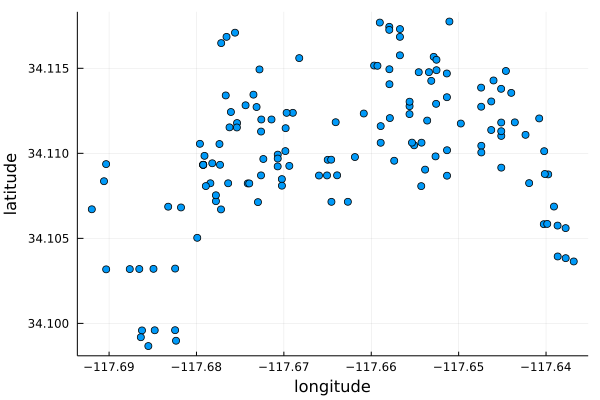

In [13]:
xval = longitude.(S)
yval = latitude.(S)
plot(xval, yval, xlab="longitude", ylab="latitude", seriestype=:scatter, lab="")

## Guardar rutas en formato CSV

In [ ]:
data = parse_route_data(route_data)

for R in data
    write_csv(R) 
end